# LU decomposition

| Who  | Mail | Date | What |
| ---  | ---   | --- | ---      |
|Diego Andrés Alvarez Marín | <daalvarez@unal.edu.co>  | March 20th, 2025 | Initial code |

LU decomposition is a fundamental matrix factorization technique in numerical linear algebra. It decomposes a matrix $\boldsymbol{A}$ into the product of a lower triangular matrix $\boldsymbol{L}$ and an upper triangular matrix $\boldsymbol{U}$:

$$\boldsymbol{A} = \boldsymbol{L}\boldsymbol{U}$$

This decomposition is particularly useful for solving systems of linear equations, computing determinants, and calculating matrix inverses efficiently.

In [1]:
from IPython.display import display
import pandas as pd
import scipy
import numpy as np
from numpy.random import rand
from numpy.linalg import det
import matplotlib.pyplot as plt
import time

# Increase the number of digits shown when an array is printed
np.set_printoptions(linewidth=200)

## 1. Mathematical Background

Given a square matrix $\boldsymbol{A}$, the LU decomposition finds matrices $\boldsymbol{L}$ and $\boldsymbol{U}$ such that:

$$\boldsymbol{A} = \boldsymbol{L}\boldsymbol{U}$$

Where:
- $\boldsymbol{L}$ is a lower triangular matrix with 1's on the diagonal
- $\boldsymbol{U}$ is an upper triangular matrix

For a $3 \times 3$ matrix, the decomposition looks like:

$$
\begin{pmatrix} 
A_{11} & A_{12} & A_{13} \\
A_{21} & A_{22} & A_{23} \\
A_{31} & A_{32} & A_{33}
\end{pmatrix} = 
\begin{pmatrix} 
1 & 0 & 0 \\
L_{21} & 1 & 0 \\
L_{31} & L_{32} & 1
\end{pmatrix}
\begin{pmatrix} 
U_{11} & U_{12} & U_{13} \\
0 & U_{22} & U_{23} \\
0 & 0 & U_{33}
\end{pmatrix}
$$

### Algorithm for LU Decomposition (Doolittle's Method)

The Doolittle algorithm computes $\boldsymbol{L}$ and $\boldsymbol{U}$ directly:

For $i = 1, 2, ..., n$:
   - For $j = i, i+1, ..., n$:
     $$U_{ij} = A_{ij} - \sum_{k=1}^{i-1} L_{ik} U_{kj}$$
   
   - For $j = i+1, i+2, ..., n$:
     $$L_{ji} = \frac{A_{ji} - \sum_{k=1}^{i-1} L_{jk} U_{ki}}{U_{ii}}$$

## 2. Implementation of the LU decomposition

In [2]:
def lu_decomposition(A):
    """
    Perform LU decomposition on matrix A using Doolittle's method.
    
    Parameters:
        A (numpy.ndarray): Input square matrix
        
    Returns:
        L (numpy.ndarray): Lower triangular matrix
        U (numpy.ndarray): Upper triangular matrix
    """
    # Check if A is square
    n, m = A.shape
    if n != m:
        raise ValueError("Matrix A must be square")
       
    # Initialize L and U matrices
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    
    # Set diagonal of L to 1
    np.fill_diagonal(L, 1)
    
    for i in range(n):
        # Calculate U[i,j]
        for j in range(i, n):
            U[i, j] = A[i, j] - np.sum(L[i, :i] * U[:i, j])
        
        # Calculate L[j,i]
        for j in range(i+1, n):
            L[j, i] = (A[j, i] - np.sum(L[j, :i] * U[:i, i])) / U[i, i]
    
    return L, U

## 3. Example

Let's test our implementation:

In [3]:
# Create a symmetric positive definite matrix
n = 4
A = rand(n, n)

# Compute Cholesky decomposition
L, U = lu_decomposition(A)

print("Original matrix A:")
print(A)

print("\nLower Triangular Matrix (L2):")
print(L)

print("\nUpper Triangular Matrix (U2):")
print(U)

# Verify the decomposition
print("\nVerify A = L@U:", np.allclose(A, L@U))

Original matrix A:
[[0.11211773 0.89804957 0.11728672 0.03244627]
 [0.90784615 0.28039452 0.22061424 0.13219272]
 [0.4619435  0.54356164 0.63339858 0.62045685]
 [0.64954606 0.80440257 0.5633764  0.78502884]]

Lower Triangular Matrix (L2):
[[1.         0.         0.         0.        ]
 [8.09725751 1.         0.         0.        ]
 [4.12016444 0.45149405 1.         0.        ]
 [5.7934284  0.62911842 0.71466733 1.        ]]

Upper Triangular Matrix (U2):
[[ 0.11211773  0.89804957  0.11728672  0.03244627]
 [ 0.         -6.99134414 -0.72908656 -0.13053307]
 [ 0.          0.          0.47933624  0.54570779]
 [ 0.          0.          0.          0.28917493]]

Verify A = L@U: True


## 4. Comparison with SciPy's Implementation

Now, let's compare our implementation with NumPy's built-in function:

In [4]:
# SciPy's implementation
L_scipy, U_scipy = scipy.linalg.lu(A, permute_l=True)

print("SciPy's L:")
print(L_scipy)

print("SciPy's U:")
print(U_scipy)

print("\nIs our implementation close to NumPy's?", np.allclose(L, L_scipy) and np.allclose(U, U_scipy))

SciPy's L:
[[0.1234986  1.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.50883456 0.46430085 1.         0.        ]
 [0.71548032 0.69929459 0.71466733 1.        ]]
SciPy's U:
[[0.90784615 0.28039452 0.22061424 0.13219272]
 [0.         0.86342124 0.09004117 0.01612065]
 [0.         0.         0.47933624 0.54570779]
 [0.         0.         0.         0.28917493]]

Is our implementation close to NumPy's? False


## 5. Solving linear systems using LU decomposition

One of the main applications of the LU decomposition is solving linear systems of the form $\boldsymbol{A}\boldsymbol{x} = \boldsymbol{b}$.

Given $\boldsymbol{A} = \boldsymbol{L}\boldsymbol{U}$, we can solve $\boldsymbol{A}\boldsymbol{x} = \boldsymbol{b}$ by:
1. Solving $\boldsymbol{L}\boldsymbol{y} = \boldsymbol{b}$ for $\boldsymbol{y}$
2. Solving $\boldsymbol{U}\boldsymbol{x} = \boldsymbol{y}$ for $\boldsymbol{x}$

Let's implement this:

In [5]:
# Forward substitution to solve Ly = b for y
def forward_substitution(L, b):
    n = len(b)
    y = np.zeros(n)
    for i in range(n):
        y[i] = (b[i] - np.dot(L[i, :i], y[:i])) / L[i, i]
    return y

# Backward substitution to solve Ux = y for x
def backward_substitution(U, y):
    n = len(y)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

def solve_using_lu(A, b):
    """
    Solve the linear system Ax = b using LU decomposition.
    
    Parameters:
    A (numpy.ndarray): Symmetric positive definite matrix
    b (numpy.ndarray): Right-hand side vector
    
    Returns:
    x (numpy.ndarray): Solution vector
    """
    n = A.shape[0]
    
    # Compute the LU decomposition
    L, U = lu_decomposition(A)
    
    # Forward substitution to solve Ly = b for y
    y = forward_substitution(L, b)

    # Backward substitution to solve Ux = y for x
    x = backward_substitution(U, y)
    
    return x

Let's test our solver with a simple example

In [6]:
# Create a random right-hand side vector
b = rand(n)

# Solve the system using our implementation
x_our = solve_using_lu(A, b)

# Solve the system using NumPy
x_numpy = np.linalg.solve(A, b)

print("Our solution x:")
print(x_our)
print("\nNumPy's solution x:")
print(x_numpy)
print("\nIs our solution close to NumPy's?", np.allclose(x_our, x_numpy))

# Verify the solution
print("\nVerify A@x = b:", np.allclose(A@x_our, b))

Our solution x:
[-0.34163975  0.96559847  1.37135568 -0.45493452]

NumPy's solution x:
[-0.34163975  0.96559847  1.37135568 -0.45493452]

Is our solution close to NumPy's? True

Verify A@x = b: True


## 6. Large System Performance

Now, let's compare the performance of our implementation with NumPy's for matrices of different sizes:

In [7]:
def compare_performance(sizes):
    """
    Compare the performance of our LU implementation with SciPy's.
    """
    lu_times = []
    sp_times = []

    # Create a seed for reproducibility
    np.random.seed(42)
    
    for n in sizes:
        # Create a random matrix    
        A = np.random.randn(n, n)
        
        # Time our implementation
        start_time = time.time()
        L_our, U_our = lu_decomposition(A)
        lu_time = time.time() - start_time
        lu_times.append(lu_time)
        
        # Time NumPy's implementation
        start_time = time.time()
        L_scipy, U_scipy = scipy.linalg.lu(A, permute_l=True)
        sp_time = time.time() - start_time
        sp_times.append(sp_time)

    # Pack all stats in a pandas' dataframe
    df = pd.DataFrame({
        'Size':            sizes,
        'Our time':        lu_times,
        'SciPy time':      sp_times
    })
    return df

In [8]:
# Compare performance for matrices of different sizes
print("\n\nPerformance Comparison:")
sizes = [10, 20, 50, 100, 200, 500, 1000, 2000]
df = compare_performance(sizes)
display(df)



Performance Comparison:


,Size,Our time,SciPy time
0,10,0.000795,0.000318
1,20,0.002821,0.000271
2,50,0.023334,0.000439
3,100,0.088468,0.000700
4,200,0.203506,0.001892
5,500,1.312598,0.006211
6,1000,5.749982,0.026555
7,2000,38.837254,0.113250


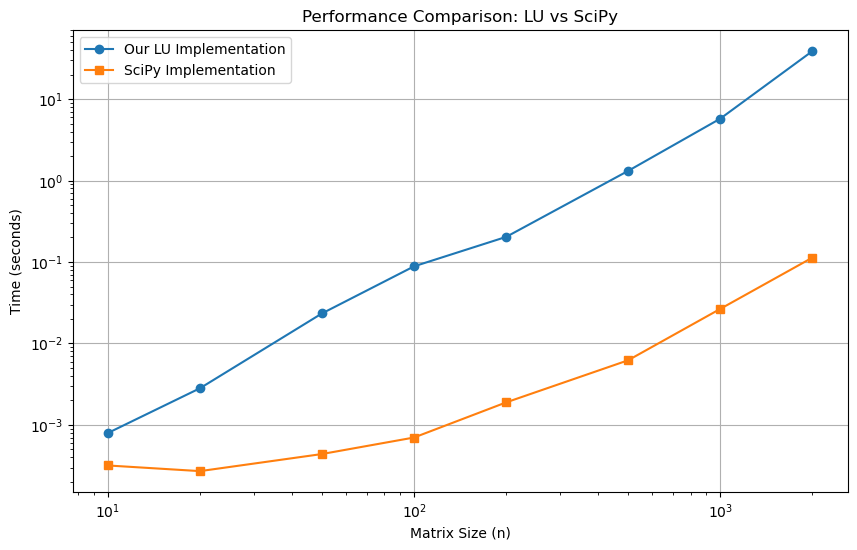

In [9]:
# Plot the performance comparison
lu_times = df['Our time']
sp_times = df['SciPy time']

plt.figure(figsize=(10, 6))
plt.plot(sizes, lu_times, 'o-', label='Our LU Implementation')
plt.plot(sizes, sp_times, 's-', label='SciPy Implementation')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: LU vs SciPy')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

#k, log_a = np.polyfit(np.log(sizes), np.log(ch_times), 1)
#plt.plot(sizes, np.exp(log_a)*sizes**k)

plt.show()

When data follows a straight line in a log-log plot, it indicates that the relationship between the two variables adheres to a *power law*. Specifically, the data can be modeled by an equation of the form $y = ax^k$. To show that, take the logarithm of both sides of the power law equation transforms it into:
$$
   \log(y) = \log(a) + k\log(x)
$$
This is a linear equation where $k$ is the slope of the line and $\log(a)$ is the intercept.

In [10]:
k, log_a = np.polyfit(np.log(sizes), np.log(lu_times), 1)
print("k =", k)
print("a =", np.exp(log_a))

k = 1.970337177734571
a = 8.299571818963576e-06


The computational complexity of the Cholesky decomposition is $O(n^3/3)$ for an $n \times n$ matrix, which is about 3 times faster than LU decomposition.

## 7. Computing the determinant

Another application of LU decomposition is efficiently computing the determinant of a matrix. For a square matrix $\boldsymbol{A}$ with LU decomposition $\boldsymbol{A} = \boldsymbol{L}\boldsymbol{U}$, the determinant is:

$$\det(\boldsymbol{A}) = \det(\boldsymbol{L}) \cdot \det(\boldsymbol{U}) = \det(\boldsymbol{U}) = \prod_{i=1}^n U_{ii}$$

This is because $\det(\boldsymbol{L}) = 1$ due to its unit diagonal.

In [11]:
def determinant_using_lu(A):
    """
    Compute the determinant of a matrix using LU decomposition.
    
    Parameters:
        A (numpy.ndarray): Input square matrix
        
    Returns:
        det (float): Determinant of the matrix
    """
    L, U = lu_decomposition(A)
    det_U = np.prod(np.diag(U))
    return det_U

In [12]:
# Calculate determinants of our example matrices
det_A_lu = determinant_using_lu(A)
det_A_np = det(A)

print(f"Determinant of A using LU decomposition: {det_A_lu:.6f}")
print(f"Determinant of A using NumPy: {det_A_np:.6f}")

Determinant of A using LU decomposition: -0.108652
Determinant of A using NumPy: -0.108652


## 8. Computing the inverse

LU decomposition can also be used to compute the inverse of a matrix efficiently:

In [13]:
def inverse_using_lu(A):
    """
    Compute the inverse of a matrix using LU decomposition.
    
    Parameters:
        A (numpy.ndarray): Input square matrix
        
    Returns:
        A_inv (numpy.ndarray): Inverse of the matrix
    """
    n = A.shape[0]
    
    # Perform LU decomposition
    L, U = lu_decomposition(A)
    
    # Initialize inverse matrix
    A_inv = np.zeros((n, n))
    
    # Identity matrix for solving Ax = I
    I = np.eye(n)
    
    # Solve for each column of the identity matrix
    for i in range(n):
        y = forward_substitution(L, I[:,i])
        x = backward_substitution(U, y)
        A_inv[:,i] = x
    
    return A_inv

In [14]:
# Calculate inverse of our example matrix
A_inv_lu = inverse_using_lu(A)
A_inv_np = np.linalg.inv(A)

print("Original matrix:")
print(A)

print("\nInverse using LU decomposition:")
print(A_inv_lu)

print("\nInverse using NumPy:")
print(A_inv_np)

# Verify the solution
print("\nVerify A*A^{-1} = I:", np.allclose(A@A_inv_lu, np.identity(n)))

Original matrix:
[[0.11211773 0.89804957 0.11728672 0.03244627]
 [0.90784615 0.28039452 0.22061424 0.13219272]
 [0.4619435  0.54356164 0.63339858 0.62045685]
 [0.64954606 0.80440257 0.5633764  0.78502884]]

Inverse using LU decomposition:
[[-0.28078415  1.23811473 -0.68726778  0.34630657]
 [ 1.13205192 -0.15083767 -0.46483134  0.34599566]
 [ 0.47809147  0.26456285  4.8998235  -3.93694406]
 [-1.27076693 -1.05974043 -2.47140136  3.45811438]]

Inverse using NumPy:
[[-0.28078415  1.23811473 -0.68726778  0.34630657]
 [ 1.13205192 -0.15083767 -0.46483134  0.34599566]
 [ 0.47809147  0.26456285  4.8998235  -3.93694406]
 [-1.27076693 -1.05974043 -2.47140136  3.45811438]]

Verify A*A^{-1} = I: True


## 9. Numerical stability and pivoting

The standard LU decomposition algorithm can encounter numerical instability if small or zero diagonal elements are encountered. Partial pivoting can improve stability by swapping rows to bring the largest element in the column to the diagonal position.

## 10. Conclusions

LU decomposition is a powerful technique for matrix operations, particularly in solving linear systems. It offers computational efficiency for operations like solving multiple systems with the same coefficient matrix or computing matrix inverses.

The main advantages of LU decomposition include:
- Only one decomposition needed to solve multiple systems with the same coefficient matrix
- Efficient calculation of determinants and inverses
- Reduced computational complexity compared to direct methods for large systems

The main challenges relate to numerical stability, which can be mitigated through pivoting strategies. Modern implementations typically use partial or complete pivoting to ensure stable computations.

## To do
Learn how to use the SciPy functions: `lu_factor` and `lu_solve`.